In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = {'Date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
        'Tasks_Completed': [8, 5, 7, 6, 7, 5, 8, 4, 6, 8, 7, 6, 5, 8, 6, 7, 5, 8, 7, 6, 8, 5, 6, 7, 8, 6, 7, 8, 6, 7],
        'Mood': [6, 4, 5, 6, 7, 5, 6, 4, 5, 7, 6, 5, 4, 7, 6, 5, 4, 6, 5, 6, 7, 4, 5, 6, 7, 5, 6, 7, 5, 6]}

In [ ]:
df = pd.DataFrame(data)
df.head()

,Date,Tasks_Completed,Mood
0,2024-01-01,8,6
1,2024-01-02,5,4
2,2024-01-03,7,5
3,2024-01-04,6,6
4,2024-01-05,7,7


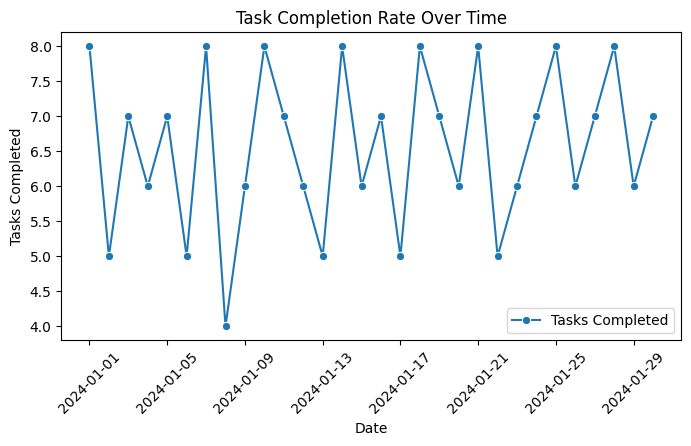

In [ ]:
# Task Completion Rate over Time
plt.figure(figsize=(8, 4))
sns.lineplot(x='Date', y='Tasks_Completed', data=df, marker='o', label="Tasks Completed")
plt.title("Task Completion Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Tasks Completed")
plt.xticks(rotation=45)
plt.show()

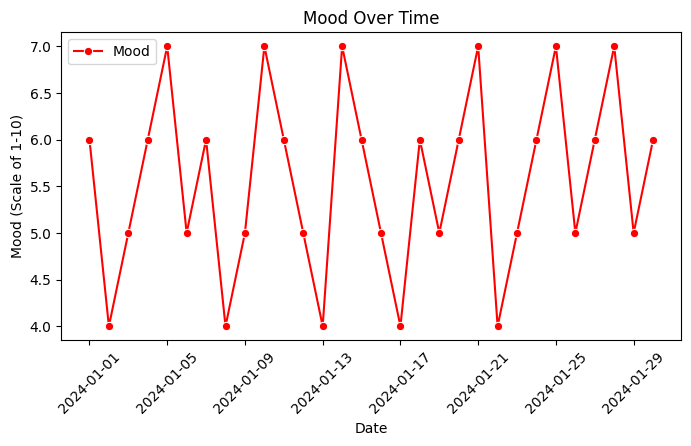

In [ ]:
# Mood over Time
plt.figure(figsize=(8, 4))
sns.lineplot(x='Date', y='Mood', data=df, marker='o', color='red', label="Mood")
plt.title("Mood Over Time")
plt.xlabel("Date")
plt.ylabel("Mood (Scale of 1-10)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.describe()

,Date,Tasks_Completed,Mood
count,30,30.000000,30.000000
mean,2024-01-15 12:00:00,6.566667,5.566667
min,2024-01-01 00:00:00,4.000000,4.000000
25%,2024-01-08 06:00:00,6.000000,5.000000
50%,2024-01-15 12:00:00,7.000000,6.000000
75%,2024-01-22 18:00:00,7.750000,6.000000
max,2024-01-30 00:00:00,8.000000,7.000000
std,NaN,1.165106,1.006302


In [ ]:
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                      Date  Tasks_Completed      Mood
Date             1.000000         0.146243  0.145967
Tasks_Completed  0.146243         1.000000  0.834289
Mood             0.145967         0.834289  1.000000


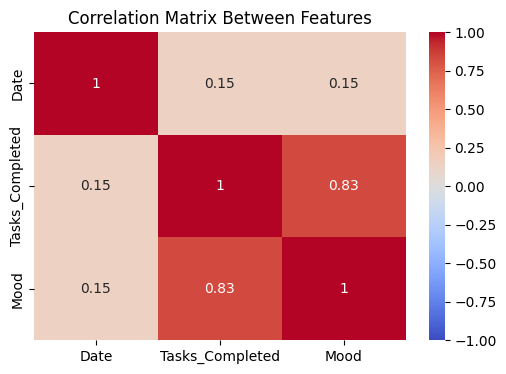

In [ ]:
# correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Between Features")
plt.show()

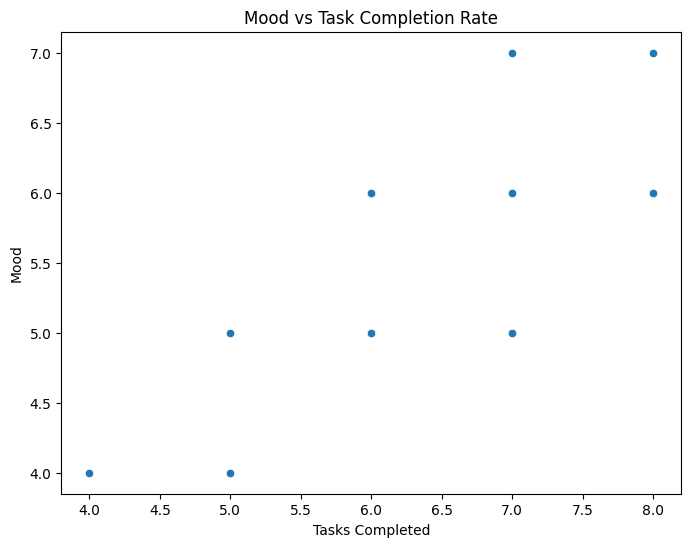

In [ ]:
# Scatter plot to analyze mood vs. task completion
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tasks_Completed', y='Mood', data=df)
plt.title("Mood vs Task Completion Rate")
plt.xlabel("Tasks Completed")
plt.ylabel("Mood")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = df[['Tasks_Completed']]
y = df['Mood']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([6.63372859, 5.91040843, 5.91040843, 6.63372859, 5.18708827,
       6.63372859])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2569656003235654


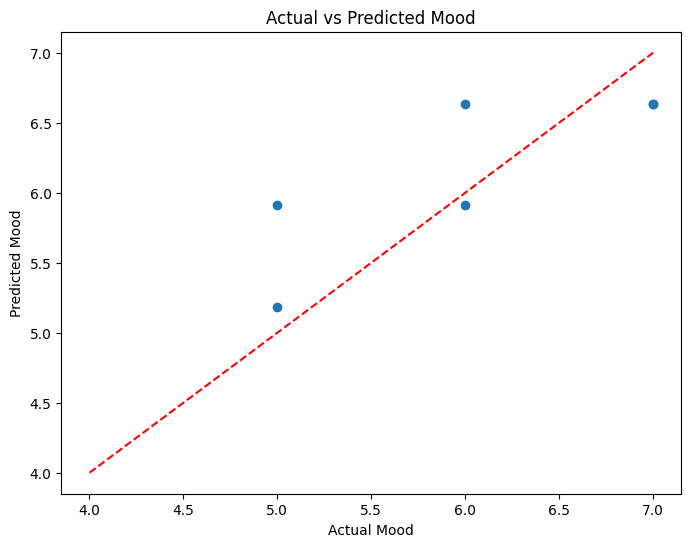

In [ ]:
# predicted vs actual moods
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Actual vs Predicted Mood")
plt.xlabel("Actual Mood")
plt.ylabel("Predicted Mood")
plt.show()